In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [ ]:
data = pd.read_csv("boston.csv")
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **Data Frame Drop()**
The drop() method removes the specified row or column

**Syntax**


```
dataframe.drop(labels, axis, index, columns, level, inplace., errors)
```
### Parameters for DataFrame Drop Operation

- **labels:** Optional, The labels or indexes to drop. If more than one, specify them in a list.
  
- **axis:**
  - 0
  - 1
  - 'index'
  - 'columns'
  Optional, Which axis to check, default 0.

- **index:**
  - String
  - List
  Optional, Specifies the name of the rows to drop. Can be used instead of the labels parameter.

- **columns:**
  - String
  - List
  Optional, Specifies the name of the columns to drop. Can be used instead of the labels parameter.

- **level:**
  - Number
  - level name
  Optional, default None. Specifies which level (in a hierarchical multi-index) to check along.

- **inplace:**
  - True
  - False
  Optional, default False. If True: the removing is done on the current DataFrame. If False: returns a copy where the removing is done.

- **errors:**
  - 'ignore'
  - 'raise'
  Optional, default 'ignore'. Specifies whether to ignore errors or not.




# **DataFrame.values**
DataFrame.values attribute in pandas is used to return a NumPy representation of the DataFrame's values. It returns a two-dimensional ndarray (NumPy array) containing the underlying data of the DataFrame, excluding the index and column labels.If the give one is series it would return a 1d array.


```
import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob'],
        'Age': [25, 28, 22],
        'City': ['New York', 'San Francisco', 'Seattle']}

df = pd.DataFrame(data)

# Access the underlying NumPy array
array_representation = df.values

print(array_representation)

```
**output**


```
array([['John', 25, 'New York'],
       ['Alice', 28, 'San Francisco'],
       ['Bob', 22, 'Seattle']], dtype=object)

```





In [ ]:
#Create feature and target array from such given data
X = data.drop('medv', axis=1).values#
y = data['medv'].values

In [ ]:
#Predicting house value from a single feature (No.of rooms)
X_rooms = X[:, 5]

In [ ]:
print(X_rooms)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

In [ ]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_rooms.shape, y.shape

((506,), (506,))

In [ ]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)
#reshape is used to convert the single dimension array to 2D array

In [ ]:
X_rooms.shape, y.shape

((506, 1), (506, 1))

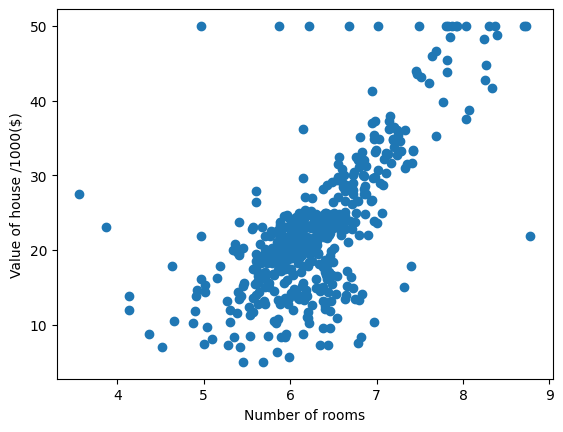

In [ ]:

#plotting house value vs. no.of rooms
plt.scatter(X_rooms, y)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [ ]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [ ]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 4.4477729015322325
MSE = 43.60055177116956
RMSE = 6.603071389222561
R_2 = 0.48352545599133423


# **linspace**
The ` numpy.linspace() ` function returns number spaces evenly w.r.t interval. Similar to ` numpy.arange() ` function but instead of step it uses sample number.

**Syntax:**


```
numpy.linspace(start, stop,
               num = 50, endpoint = True,
               retstep = False, dtype = None)
```


**Parameters:**



```
-> start  : [optional] start of interval range. By default start = 0
-> stop   : end of interval range
-> restep : If True, return (samples, step). By default restep = False
-> num    : [int, optional] No. of samples to generate
-> dtype  : type of output array
```



In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)


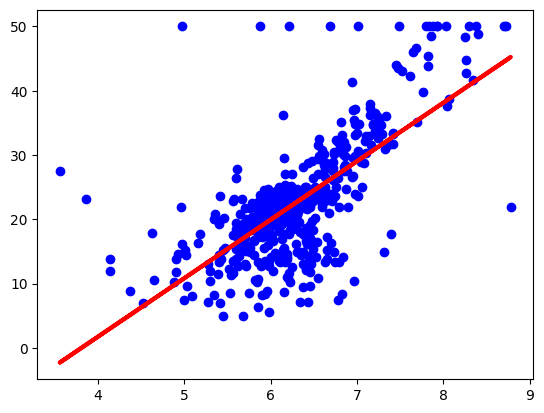

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()

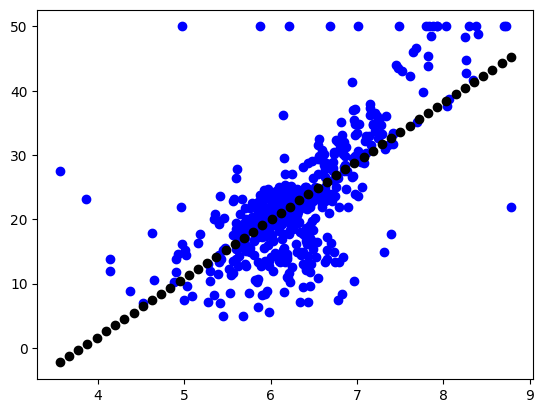

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),'o', color='black', linewidth=3)
#plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()
